### Projekt Opgave 9-14 med Breast Cancer Datasæt: Decision Trees, DT Visualisering, Metrics

9. Træn en beslutningstræ-model (`DecisionTreeClassifier`) og sammenlign dens præstation med logistisk regression. Eksperimenter med værdier af `max_depth`.

10. Visualiser træet ved hjælp af `plot_tree()`.

11. Beregn `precision_score`, `recall_score`, og `f1_score` for den trænede model.

12. Diskutér, hvornår man bør prioritere `precision` over `recall`.

13. Anvend `cross_val_score` til at evaluere modellens præstation med 5-fold cross-validation. Eksperimenter med forskellige værdier af parametren `cv`.

14. Sammenlign resultaterne for beslutningstræer og logistisk regression.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

### Databehandling

In [3]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer['data'], columns=breast_cancer['feature_names'])
df['target'] = breast_cancer['target']

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Splittelse i Trænings og Datasæt

In [4]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, train_size=0.8, random_state=42)

### Beslutningstræ Opsætning

In [5]:
DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Resultater

In [6]:
y_pred = DT_clf.predict(X_test)

pred_df = pd.DataFrame({
    'Predicted': y_pred,
    'Actual': y_test
})

pred_df.sample(frac=1)

,Predicted,Actual
468,0,0
104,1,1
208,1,1
329,1,0
535,0,0
...,...,...
167,0,0
249,1,1
561,1,1
9,0,0


### Metrics

In [7]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#Manuelt:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")

Accuracy: 0.9385964912280702
F1-Score: 0.951048951048951
Precision: 0.9444444444444444
Recall: 0.9577464788732394


### Classification Report

In [8]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.928571,0.944444,0.938596,0.936508,0.938457
recall,0.906977,0.957746,0.938596,0.932362,0.938596
f1-score,0.917647,0.951049,0.938596,0.934348,0.938450
support,43.000000,71.000000,0.938596,114.000000,114.000000


In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[39,  4],
       [ 3, 68]])

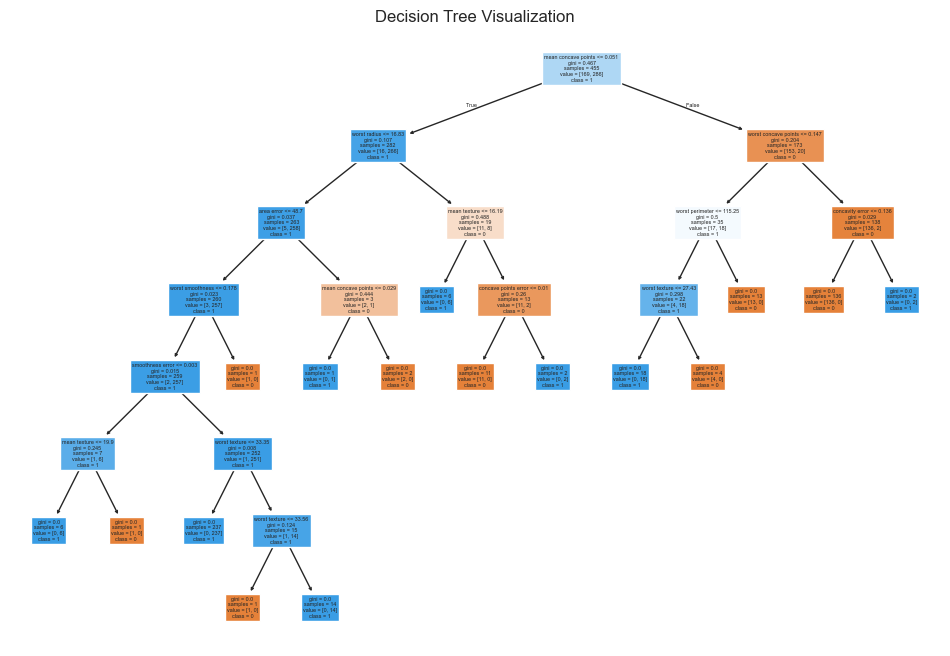

In [10]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(DT_clf, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in y.unique()])
plt.title("Decision Tree Visualization")
plt.show()

### Cross Validation

In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np
c_val = cross_val_score(DT_clf, X, y, cv=5)

i = 1
for  val in c_val:
    print(f"Iteration {i}: {val}")
    i = i+1



Iteration 1: 0.9122807017543859
Iteration 2: 0.9385964912280702
Iteration 3: 0.8947368421052632
Iteration 4: 0.9473684210526315
Iteration 5: 0.9026548672566371
